In [1]:
import sys
import numpy as np
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt


import pandas as pd

In [2]:
## PLOT configs
plt.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'font.size' : 15,                   # Set font size to 11pt
    'axes.labelsize': 15,               # -> axis labels
    'xtick.labelsize':12,
    'ytick.labelsize':12,
    'legend.fontsize': 12,
    'lines.linewidth':2,
    'text.usetex': False,
    'pgf.rcfonts': False,
})
# plt.tight_layout(rect=[0, 0.03, 1, 0.85])

In [3]:
df = pd.read_pickle("lambda-var1")

In [4]:
df

,N,d,sigma,runs,ttsplit,lamb,frac_train,f_c,f_m,eps_c,...,t1_thetadiff_jorgmax_mean,t1_thetadiff_jorgmax_std,t1_jorgavg_train_mean,t1_jorgavg_train_std,t1_jorgavg_test_mean,t1_jorgavg_test_std,t1_thetahat_jorgavg_mean,t1_thetahat_jorgavg_std,t1_thetadiff_jorgavg_mean,t1_thetadiff_jorgavg_std
0,1000,10,0,10000,0.1,0.01,1.0,0.34,0.43,0.01,...,485.629670,153.086210,166696.035985,215421.371086,169394.387374,215673.141418,670.774092,214.941520,670.774092,214.941520
1,1000,10,0,10000,0.1,0.10,1.0,0.34,0.43,0.01,...,16.375810,5.162118,189.526214,244.923330,192.594271,245.208641,22.618704,7.247271,22.618704,7.247271
2,1000,10,0,10000,0.1,0.50,1.0,0.34,0.43,0.01,...,1.631600,0.513782,1.881778,2.424811,1.912916,2.428120,2.252116,0.720939,2.252116,0.720939
3,1000,10,0,10000,0.1,1.00,1.0,0.34,0.43,0.01,...,0.623345,0.195500,0.279209,0.352421,0.284728,0.353730,0.858516,0.274137,0.858516,0.274137
4,1000,10,0,10000,0.1,3.00,1.0,0.34,0.43,0.01,...,0.146112,0.044315,0.026702,0.023812,0.028725,0.025054,0.197858,0.062004,0.197858,0.062004
5,1000,10,0,10000,0.1,5.00,1.0,0.34,0.43,0.01,...,0.077877,0.022747,0.019423,0.010882,0.021579,0.011724,0.103563,0.031775,0.103563,0.031775
6,1000,10,0,10000,0.1,7.00,1.0,0.34,0.43,0.01,...,0.052327,0.014792,0.019264,0.007318,0.021558,0.007896,0.068536,0.020635,0.068536,0.020635
7,1000,10,0,10000,0.1,10.00,1.0,0.34,0.43,0.01,...,0.034770,0.009450,0.020263,0.004945,0.022696,0.005321,0.044743,0.013160,0.044743,0.013160
8,1000,10,0,10000,0.1,15.00,1.0,0.34,0.43,0.01,...,0.020930,0.005269,0.021693,0.002916,0.024258,0.003127,0.026081,0.007314,0.026081,0.007314
9,1000,10,0,10000,0.1,20.00,1.0,0.34,0.43,0.01,...,0.014973,0.003567,0.022676,0.002038,0.025318,0.002180,0.018262,0.004940,0.018262,0.004940


In [5]:
df['lamb']

0        0.01
1        0.10
2        0.50
3        1.00
4        3.00
5        5.00
6        7.00
7       10.00
8       15.00
9       20.00
10      25.00
11      50.00
12      75.00
13     100.00
14     125.00
15     150.00
16     175.00
17     200.00
18     300.00
19     400.00
20     500.00
21    1000.00
Name: lamb, dtype: float64

In [6]:
df['t1_thetadiff_oa_mean']

0     436.367390
1      14.714530
2       1.466359
3       0.560687
4       0.132334
5       0.071039
6       0.048008
7       0.032105
8       0.019540
9       0.014074
10      0.011018
11      0.005316
12      0.003512
13      0.002623
14      0.002094
15      0.001743
16      0.001492
17      0.001305
18      0.000869
19      0.000651
20      0.000521
21      0.000260
Name: t1_thetadiff_oa_mean, dtype: float64

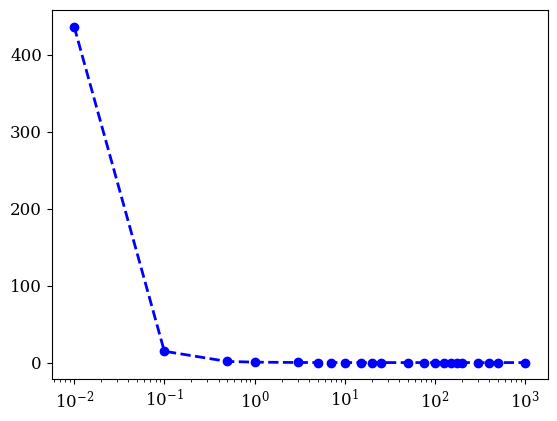

In [9]:
plt.xscale('log')
plt.plot(df['lamb'], df['t1_thetadiff_oa_mean'], '--bo') # plotting t, a separately 

In [10]:
df = pd.read_pickle("lambda-var2")

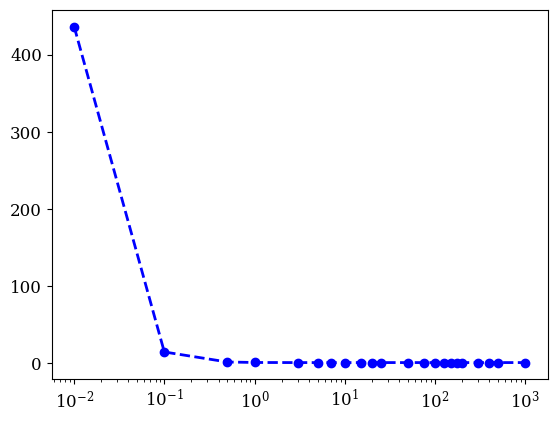

In [11]:
plt.xscale('log')
plt.plot(df['lamb'], df['t1_thetadiff_oa_mean'], '--bo') # plotting t, a separately 

In [12]:
df['t1_thetadiff_oa_mean']

0     436.369435
1      14.739369
2       1.740554
3       1.111683
4       0.990194
5       0.989855
6       0.991477
7       0.993349
8       0.995172
9       0.996235
10      0.996918
11      0.998388
12      0.998909
13      0.999176
14      0.999338
15      0.999447
16      0.999525
17      0.999583
18      0.999721
19      0.999790
20      0.999832
21      0.999916
Name: t1_thetadiff_oa_mean, dtype: float64

In [13]:
df['lamb']

0        0.01
1        0.10
2        0.50
3        1.00
4        3.00
5        5.00
6        7.00
7       10.00
8       15.00
9       20.00
10      25.00
11      50.00
12      75.00
13     100.00
14     125.00
15     150.00
16     175.00
17     200.00
18     300.00
19     400.00
20     500.00
21    1000.00
Name: lamb, dtype: float64

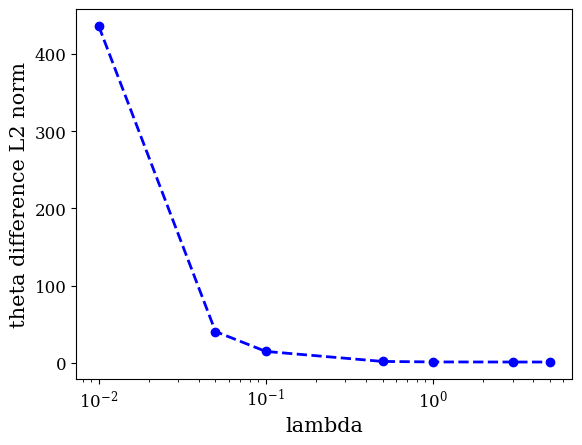

In [19]:
df = pd.read_pickle("lambda-var2")
plt.xscale('log')
plt.xlabel('lambda')
plt.ylabel('theta difference L2 norm')
plt.plot(df['lamb'], df['t1_thetadiff_oa_mean'], '--bo') # plotting t, a separately 

In [20]:
df['lamb'], df['t1_thetadiff_oa_mean']

(0    0.01
 1    0.05
 2    0.10
 3    0.50
 4    1.00
 5    3.00
 6    5.00
 Name: lamb, dtype: float64,
 0    436.369435
 1     40.517817
 2     14.739369
 3      1.740554
 4      1.111683
 5      0.990194
 6      0.989855
 Name: t1_thetadiff_oa_mean, dtype: float64)

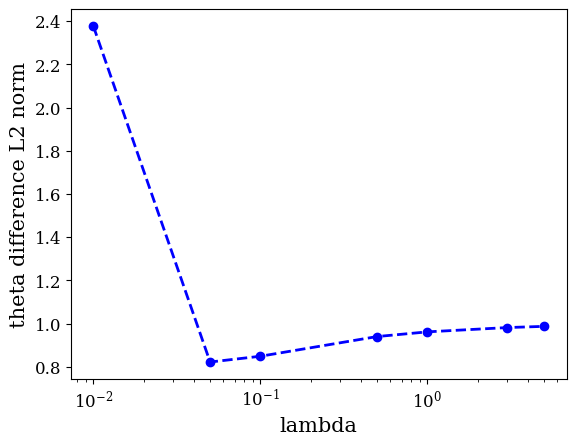

In [21]:
df = pd.read_pickle("lambda-var-bigeps")
plt.xscale('log')
plt.xlabel('lambda')
plt.ylabel('theta difference L2 norm')
plt.plot(df['lamb'], df['t1_thetadiff_oa_mean'], '--bo') # plotting t, a separately 

In [22]:
df['lamb'], df['t1_thetadiff_oa_mean']

(0    0.01
 1    0.05
 2    0.10
 3    0.50
 4    1.00
 5    3.00
 6    5.00
 Name: lamb, dtype: float64,
 0    2.377131
 1    0.822603
 2    0.849317
 3    0.940469
 4    0.962191
 5    0.981997
 6    0.987649
 Name: t1_thetadiff_oa_mean, dtype: float64)

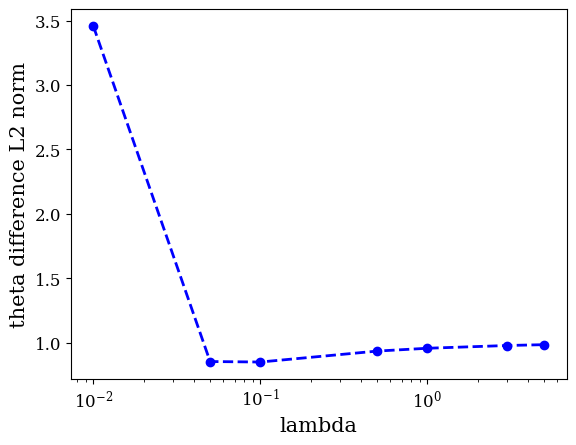

In [33]:
df = pd.read_pickle("lambda-var-bigN")
plt.xscale('log')
plt.xlabel('lambda')
plt.ylabel('theta difference L2 norm')
plt.plot(df['lamb'], df['t1_thetadiff_oa_mean'], '--bo')

In [34]:
df['lamb'], df['t1_thetadiff_oa_mean']

(0    0.01
 1    0.05
 2    0.10
 3    0.50
 4    1.00
 5    3.00
 6    5.00
 Name: lamb, dtype: float64,
 0    3.457211
 1    0.853986
 2    0.850190
 3    0.935063
 4    0.957036
 5    0.978360
 6    0.984893
 Name: t1_thetadiff_oa_mean, dtype: float64)

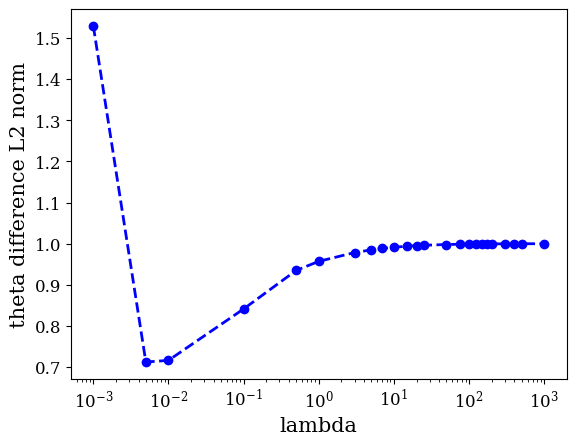

In [37]:
df = pd.read_pickle("lambda-var-huge-eps")
plt.xscale('log')
plt.xlabel('lambda')
plt.ylabel('theta difference L2 norm')
plt.plot(df['lamb'], df['t1_thetadiff_oa_mean'], '--bo')

In [38]:
df['lamb'], df['t1_thetadiff_oa_mean']

(0        0.001
 1        0.005
 2        0.010
 3        0.100
 4        0.500
 5        1.000
 6        3.000
 7        5.000
 8        7.000
 9       10.000
 10      15.000
 11      20.000
 12      25.000
 13      50.000
 14      75.000
 15     100.000
 16     125.000
 17     150.000
 18     175.000
 19     200.000
 20     300.000
 21     400.000
 22     500.000
 23    1000.000
 Name: lamb, dtype: float64,
 0     1.529022
 1     0.712327
 2     0.716370
 3     0.841352
 4     0.934941
 5     0.957055
 6     0.978403
 7     0.984928
 8     0.988337
 9     0.991259
 10    0.993818
 11    0.995214
 12    0.996094
 13    0.997964
 14    0.998623
 15    0.998960
 16    0.999164
 17    0.999301
 18    0.999400
 19    0.999474
 20    0.999648
 21    0.999735
 22    0.999788
 23    0.999894
 Name: t1_thetadiff_oa_mean, dtype: float64)

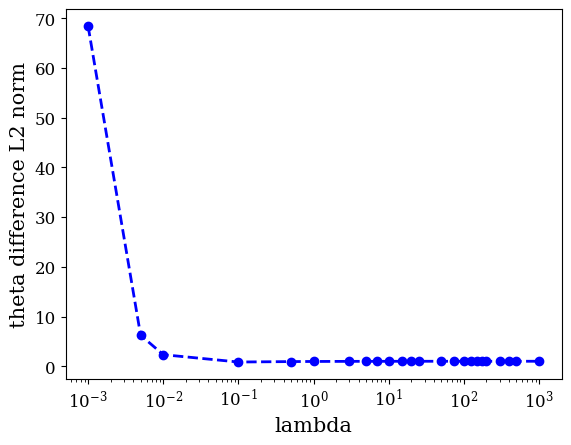

In [39]:
df = pd.read_pickle("lambda-var-all10")
plt.xscale('log')
plt.xlabel('lambda')
plt.ylabel('theta difference L2 norm')
plt.plot(df['lamb'], df['t1_thetadiff_oa_mean'], '--bo')

In [40]:
df['t1_thetadiff_oa_mean']

0     68.437094
1      6.237680
2      2.324946
3      0.845442
4      0.935051
5      0.957091
6      0.978412
7      0.984933
8      0.988340
9      0.991261
10     0.993819
11     0.995215
12     0.996095
13     0.997964
14     0.998623
15     0.998960
16     0.999164
17     0.999301
18     0.999400
19     0.999474
20     0.999648
21     0.999735
22     0.999788
23     0.999894
Name: t1_thetadiff_oa_mean, dtype: float64

[0.2] [0.2] [0.2]
[50000] [10]
[733.77355146  66.43091955  23.70398494   1.12320464   0.89896479
   0.92195392   0.9541218    0.966666     0.97372808   0.98003152
   0.98572275   0.98888523   0.99089964   0.99522453   0.99676265
   0.99755129   0.99803096   0.99835348   0.99858522   0.99875977
   0.99916958   0.99937583   0.99950001   0.99974935]


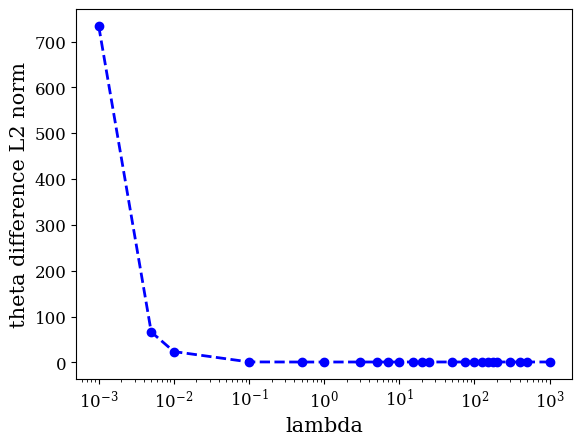

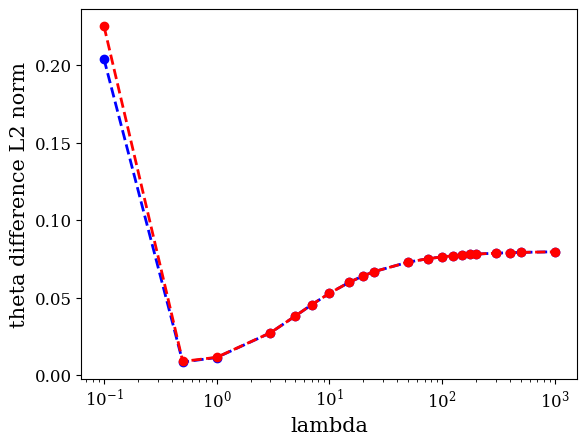

In [46]:
df = pd.read_pickle("lambda-var-eps0.2-N50k")
print(df['eps_c'].unique(), df['eps_m'].unique(), df['eps_l'].unique())
print(df['N'].unique(), df['d'].unique())

plt.xscale('log')
plt.xlabel('lambda')
plt.ylabel('theta difference L2 norm')
print(df['t1_thetadiff_oa_mean'].to_numpy())

plt.plot(df['lamb'], df['t1_thetadiff_oa_mean'], '--bo')
plt.show()

plt.xscale('log')
plt.xlabel('lambda')
plt.ylabel('theta difference L2 norm')

plt.plot(df['lamb'][3:], df['t1_oa_test_mean'][3:], '--bo')
plt.plot(df['lamb'][3:], df['t1_sdp_test_mean'][3:], '--ro')

In [47]:
df = pd.read_pickle("lambda-var-demoRakshit-nm")
print(df['eps_c'].unique(), df['eps_m'].unique(), df['eps_l'].unique())
print(df['N'].unique(), df['d'].unique())

plt.xscale('log')
plt.xlabel('lambda')
plt.ylabel('theta difference L2 norm')
print(df['t1_thetadiff_oa_mean'].to_numpy())

plt.plot(df['lamb'], df['t1_thetadiff_oa_mean'], '--bo')
plt.show()

plt.xscale('log')
plt.xlabel('lambda')
plt.ylabel('theta difference L2 norm')

plt.plot(df['lamb'][3:], df['t1_oa_test_mean'][3:], '--bo')
plt.plot(df['lamb'][3:], df['t1_sdp_test_mean'][3:], '--ro')

FileNotFoundError: [Errno 2] No such file or directory: 'lambda-var-demoRakshit-nm'

In [42]:
df.columns

Index(['N', 'd', 'sigma', 'runs', 'ttsplit', 'lamb', 'frac_train', 'f_c',
       'f_m', 'eps_c', 'eps_m', 'eps_l', 'type1_nonpriv_loss',
       't1_oa_train_mean', 't1_oa_train_std', 't1_oa_test_mean',
       't1_oa_test_std', 't1_thetahat_oa_mean', 't1_thetahat_oa_std',
       't1_thetadiff_oa_mean', 't1_thetadiff_oa_std', 't1_sdp_train_mean',
       't1_sdp_train_std', 't1_sdp_test_mean', 't1_sdp_test_std',
       't1_thetahat_sdp_mean', 't1_thetahat_sdp_std', 't1_thetadiff_sdp_mean',
       't1_thetadiff_sdp_std', 't1_jorgmax_train_mean', 't1_jorgmax_train_std',
       't1_jorgmax_test_mean', 't1_jorgmax_test_std',
       't1_thetahat_jorgmax_mean', 't1_thetahat_jorgmax_std',
       't1_thetadiff_jorgmax_mean', 't1_thetadiff_jorgmax_std',
       't1_jorgavg_train_mean', 't1_jorgavg_train_std', 't1_jorgavg_test_mean',
       't1_jorgavg_test_std', 't1_thetahat_jorgavg_mean',
       't1_thetahat_jorgavg_std', 't1_thetadiff_jorgavg_mean',
       't1_thetadiff_jorgavg_std'],
      dtype

[1] [1] [1]
[10000] [10]
[684.30410671  61.96214851  22.11744132   1.12602191   0.93862597
   0.95778664   0.97850721   0.98497887   0.98836928   0.99127963
   0.99382984   0.99522191   0.99610034   0.9979667    0.99862455
   0.99896073   0.99916485   0.99930194   0.99940037   0.99947447
   0.99964831   0.99973573   0.99978834   0.99989393]


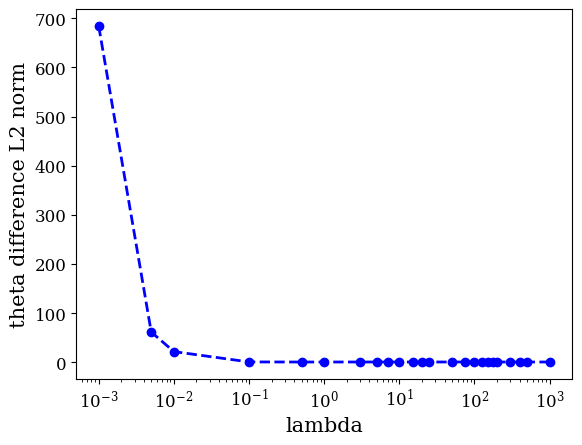

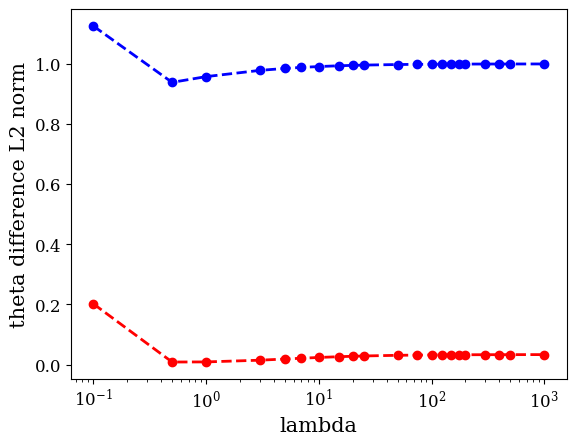

In [44]:
df = pd.read_pickle("lambda-var-eps1-N10k")
print(df['eps_c'].unique(), df['eps_m'].unique(), df['eps_l'].unique())
print(df['N'].unique(), df['d'].unique())

plt.xscale('log')
plt.xlabel('lambda')
plt.ylabel('theta difference L2 norm')
print(df['t1_thetadiff_oa_mean'].to_numpy())

plt.plot(df['lamb'], df['t1_thetadiff_oa_mean'], '--bo')
plt.show()

plt.xscale('log')
plt.xlabel('lambda')
plt.ylabel('theta difference L2 norm')

plt.plot(df['lamb'][3:], df['t1_thetadiff_oa_mean'][3:], '--bo')

[10] [10] [10]
[1000] [10]
[694.60106623  62.88274452  22.43724658   1.121916     0.9432368
   0.96259434   0.98202221   0.98765745   0.99052551   0.9929454
   0.99503748   0.9961686    0.99687869   0.99837857   0.99890454
   0.99917281   0.99933552   0.99944474   0.99952312   0.99958211
   0.99972044   0.99978996   0.99983179   0.99991572]


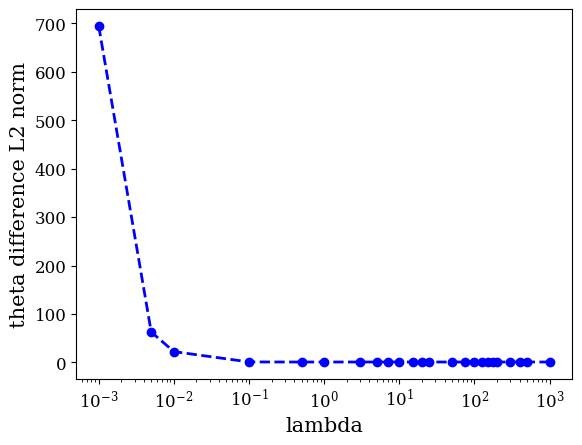

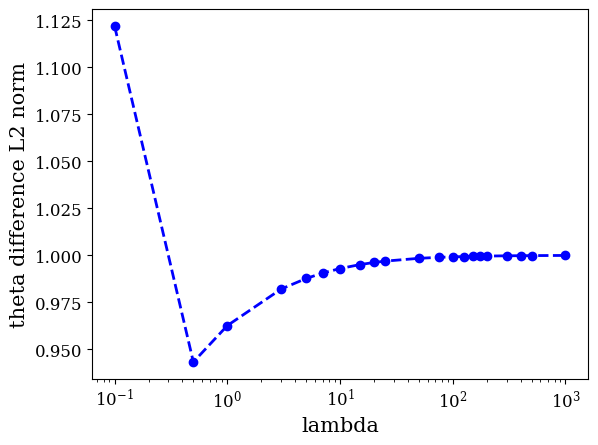

In [59]:
df = pd.read_pickle("lambda-var-eps10-N1k")
print(df['eps_c'].unique(), df['eps_m'].unique(), df['eps_l'].unique())
print(df['N'].unique(), df['d'].unique())

plt.xscale('log')
plt.xlabel('lambda')
plt.ylabel('theta difference L2 norm')
print(df['t1_thetadiff_oa_mean'].to_numpy())

plt.plot(df['lamb'], df['t1_thetadiff_oa_mean'], '--bo')
plt.show()

plt.xscale('log')
plt.xlabel('lambda')
plt.ylabel('theta difference L2 norm')

plt.plot(df['lamb'][3:], df['t1_thetadiff_oa_mean'][3:], '--bo')

In [6]:
df = pd.read_pickle("lambda-var-eps0.2-N50kv2")
df['t1_sdp_test_mean']

0     188266.570845
1       1543.221710
2        196.413073
3          0.225225
4          0.008732
5          0.011389
6          0.027252
7          0.038134
8          0.045464
9          0.052718
10         0.059825
11         0.063999
12         0.066740
13         0.072836
14         0.075073
15         0.076233
16         0.076944
17         0.077423
18         0.077769
19         0.078030
20         0.078644
21         0.078954
22         0.079141
23         0.079517
Name: t1_sdp_test_mean, dtype: float64

In [7]:
df['lamb'][3:]

3        0.1
4        0.5
5        1.0
6        3.0
7        5.0
8        7.0
9       10.0
10      15.0
11      20.0
12      25.0
13      50.0
14      75.0
15     100.0
16     125.0
17     150.0
18     175.0
19     200.0
20     300.0
21     400.0
22     500.0
23    1000.0
Name: lamb, dtype: float64

[0.2] [0.5] [1.]
[50000] [10]


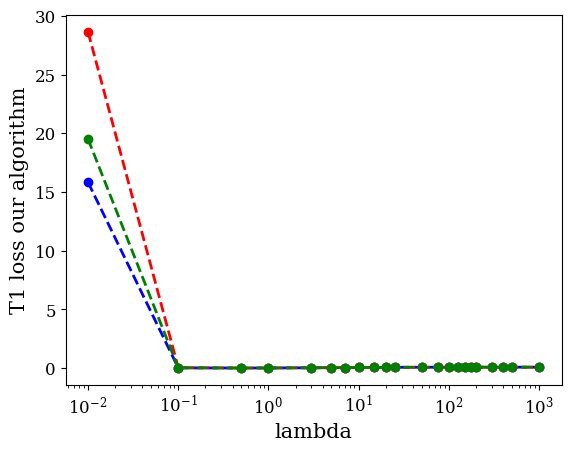

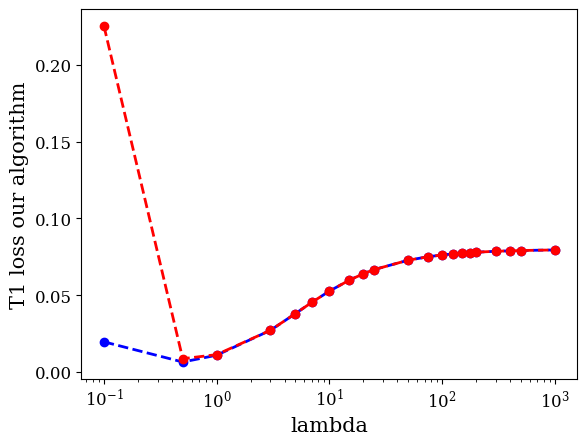

In [8]:
print(df['eps_c'].unique(), df['eps_m'].unique(), df['eps_l'].unique())
print(df['N'].unique(), df['d'].unique())

plt.xscale('log')
plt.xlabel('lambda')
plt.ylabel('T1 loss our algorithm')

plt.plot(df['lamb'][2:], df['t1_oa_test_mean'][2:], '--bo')
plt.plot(df['lamb'][2:], df['t1_jorgavg_test_mean'][2:], '--ro')
plt.plot(df['lamb'][2:], df['t1_jorgmax_test_mean'][2:], '--go')


plt.show()

plt.xscale('log')
plt.xlabel('lambda')
plt.ylabel('T1 loss our algorithm')

plt.plot(df['lamb'][3:], df['t1_oa_test_mean'][3:], '--bo')
plt.plot(df['lamb'][3:], df['t1_sdp_test_mean'][3:], '--ro')
# # plt.plot(df['lamb'][5:], df['t1_jorgavg_test_mean'][5:], '--ro')
# # plt.plot(df['lamb'][5:], df['t1_jorgmax_test_mean'][5:], '--go')
# # plt.plot(df['lamb'][5:], df['t1_jorgmax_test_mean'][5:], '--go')
# plt.show()

# plt.xscale('log')
# plt.plot(df['lamb'][4:], df['t1_oa_test_std'][4:], '--bo')
# plt.plot(df['lamb'][4:], df['t1_jorgavg_test_std'][4:], '--ro')
# plt.plot(df['lamb'][4:], df['t1_jorgmax_test_std'][4:], '--go')
# plt.show()

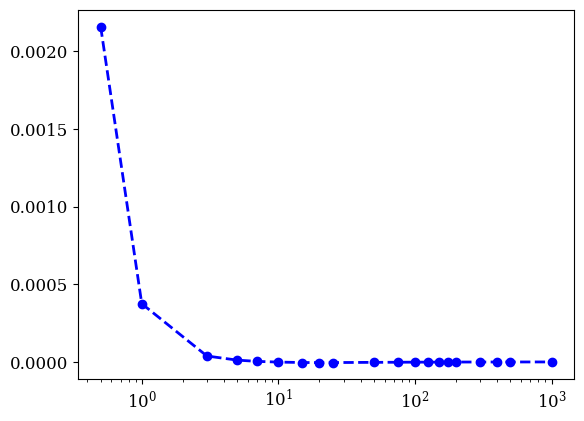

In [11]:
plt.xscale('log')

plt.plot(df['lamb'][4:], df['t1_sdp_test_mean'][4:] - df['t1_oa_test_mean'][4:], '--bo')
# plt.plot(df['lamb'][3:], df['t1_sdp_test_mean'][3:], '--ro')

In [52]:
df = pd.read_pickle("lambda-var-demoRakshit-nm")
df['eps_c'], df['eps_m']

(0     0.1
 1     0.1
 2     0.1
 3     0.1
 4     0.1
 5     0.1
 6     0.1
 7     0.1
 8     0.1
 9     0.1
 10    0.1
 11    0.1
 12    0.1
 13    0.1
 14    0.1
 15    0.1
 16    0.1
 17    0.1
 18    0.1
 19    0.1
 20    0.1
 21    0.1
 22    0.1
 23    0.1
 Name: eps_c, dtype: float64,
 0     0.5
 1     0.5
 2     0.5
 3     0.5
 4     0.5
 5     0.5
 6     0.5
 7     0.5
 8     0.5
 9     0.5
 10    0.5
 11    0.5
 12    0.5
 13    0.5
 14    0.5
 15    0.5
 16    0.5
 17    0.5
 18    0.5
 19    0.5
 20    0.5
 21    0.5
 22    0.5
 23    0.5
 Name: eps_m, dtype: float64)

[0.1] [0.5] [1.]
[50000] [30]


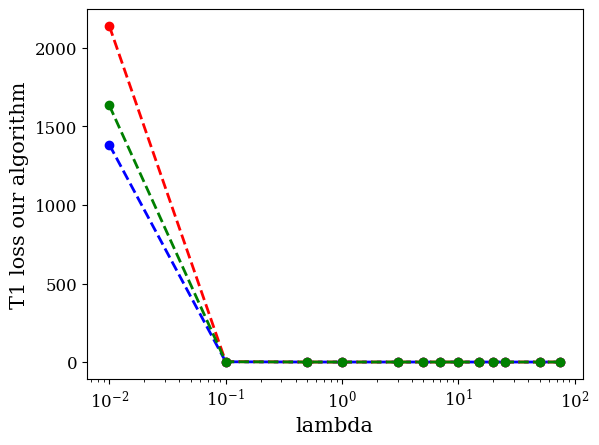

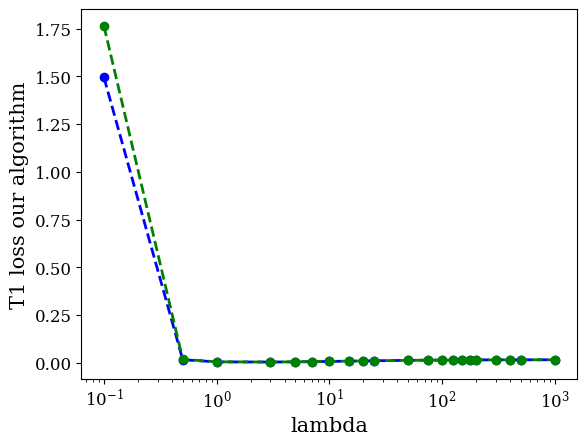

In [67]:
# GOOD CODE BLOCK< CHECK IT OUT
print(df['eps_c'].unique(), df['eps_m'].unique(), df['eps_l'].unique())
print(df['N'].unique(), df['d'].unique())

plt.xscale('log')
plt.xlabel('lambda')
plt.ylabel('T1 loss our algorithm')

plt.plot(df['lamb'][2:15], df['t1_oa_test_mean'][2:15], '--bo')
plt.plot(df['lamb'][2:15], df['t1_jorgavg_test_mean'][2:15], '--ro')
plt.plot(df['lamb'][2:15], df['t1_jorgmax_test_mean'][2:15], '--go')


plt.show()

plt.xscale('log')
plt.xlabel('lambda')
plt.ylabel('T1 loss our algorithm')

plt.plot(df['lamb'][3:], df['t1_oa_test_mean'][3:], '--bo')
plt.plot(df['lamb'][3:], df['t1_jorgmax_test_mean'][3:], '--go')
# plt.plot(df['lamb'][5:], df['t1_sdp_test_mean'][5:] , '--ro')5
# plt.plot(df['lamb'][3:15], df['t1_sdp_test_mean'][3:15], '--ro')
# # plt.plot(df['lamb'][5:], df['t1_jorgavg_test_mean'][5:], '--ro')
# # plt.plot(df['lamb'][5:], df['t1_jorgmax_test_mean'][5:], '--go')
# # plt.plot(df['lamb'][5:], df['t1_jorgmax_test_mean'][5:], '--go')
# plt.show()

# plt.xscale('log')
# plt.plot(df['lamb'][4:], df['t1_oa_test_std'][4:], '--bo')
# plt.plot(df['lamb'][4:], df['t1_jorgavg_test_std'][4:], '--ro')
# plt.plot(df['lamb'][4:], df['t1_jorgmax_test_std'][4:], '--go')
# plt.show()

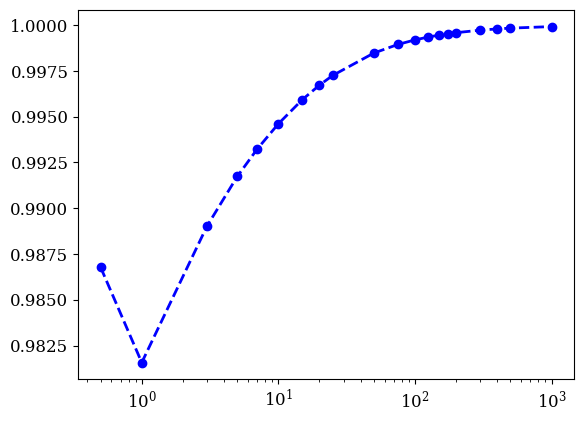

In [61]:
# GOOD CODE BLOCK thetadiff
plt.xscale('log')
plt.plot(df['lamb'][4:], df['t1_thetadiff_oa_mean'][4:], '--bo')

In [32]:
df['lamb']

0        0.001
1        0.005
2        0.010
3        0.100
4        0.500
5        1.000
6        3.000
7        5.000
8        7.000
9       10.000
10      15.000
11      20.000
12      25.000
13      50.000
14      75.000
15     100.000
16     125.000
17     150.000
18     175.000
19     200.000
20     300.000
21     400.000
22     500.000
23    1000.000
Name: lamb, dtype: float64

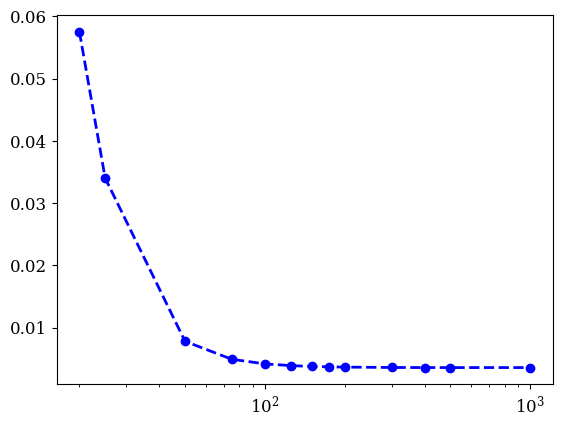

In [36]:
plt.xscale('log')
# plt.xlim(left=100)
# plt.ylim(top=0.02)
plt.plot(df['lamb'][11:], df['t1_sdp_test_mean'][11:], '--bo')

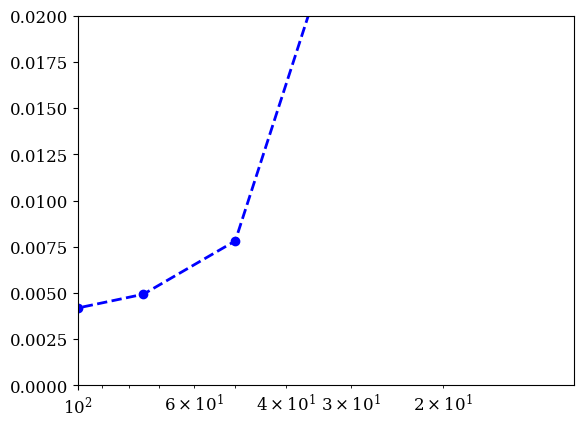

In [39]:
plt.xscale('log')
plt.xlim(left=100)
plt.ylim(top=0.02)
plt.plot(df['lamb'][11:], df['t1_sdp_test_mean'][11:], '--bo')

In [121]:
df['lamb'][3:15]

3      0.1
4      0.5
5      1.0
6      3.0
7      5.0
8      7.0
9     10.0
10    15.0
11    20.0
12    25.0
13    50.0
14    75.0
Name: lamb, dtype: float64

In [125]:
df[['lamb', 't1_oa_test_mean', 't1_sdp_test_mean']]

,lamb,t1_oa_test_mean,t1_sdp_test_mean
0,0.001,4.208060e+11,4.679558e+14
1,0.005,3.414391e+09,3.796960e+12
2,0.010,4.313172e+08,4.796446e+11
3,0.100,4.654106e+05,5.175570e+08
4,0.500,4.242762e+03,4.718009e+06
5,1.000,5.818028e+02,6.469360e+05
6,3.000,2.670558e+01,2.968271e+04
7,5.000,6.608384e+00,7.339305e+03
8,7.000,2.674252e+00,2.966356e+03
9,10.000,1.040637e+00,1.150980e+03


In [ ]:
df = pd.read_pickle("lambda-var-")
df['eps_c']